In [88]:
import numpy as np
import cv2
import pandas as pd
from scipy.ndimage import label
import matplotlib.pyplot as plt

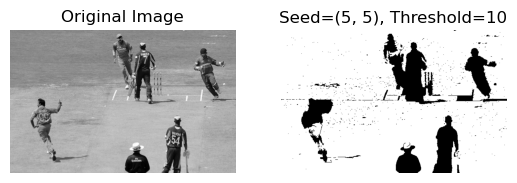

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    
    
    segmented_image[seed] = 255 
  
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
 
    to_process = [seed]
    
    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel
      
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny)) 
    
    return segmented_image

image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

seed = (5, 5)
threshold = 10


segmented_image = region(image_gray, seed, threshold)


plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title(f"Seed={seed}, Threshold={threshold}")
plt.axis("off")

plt.show()


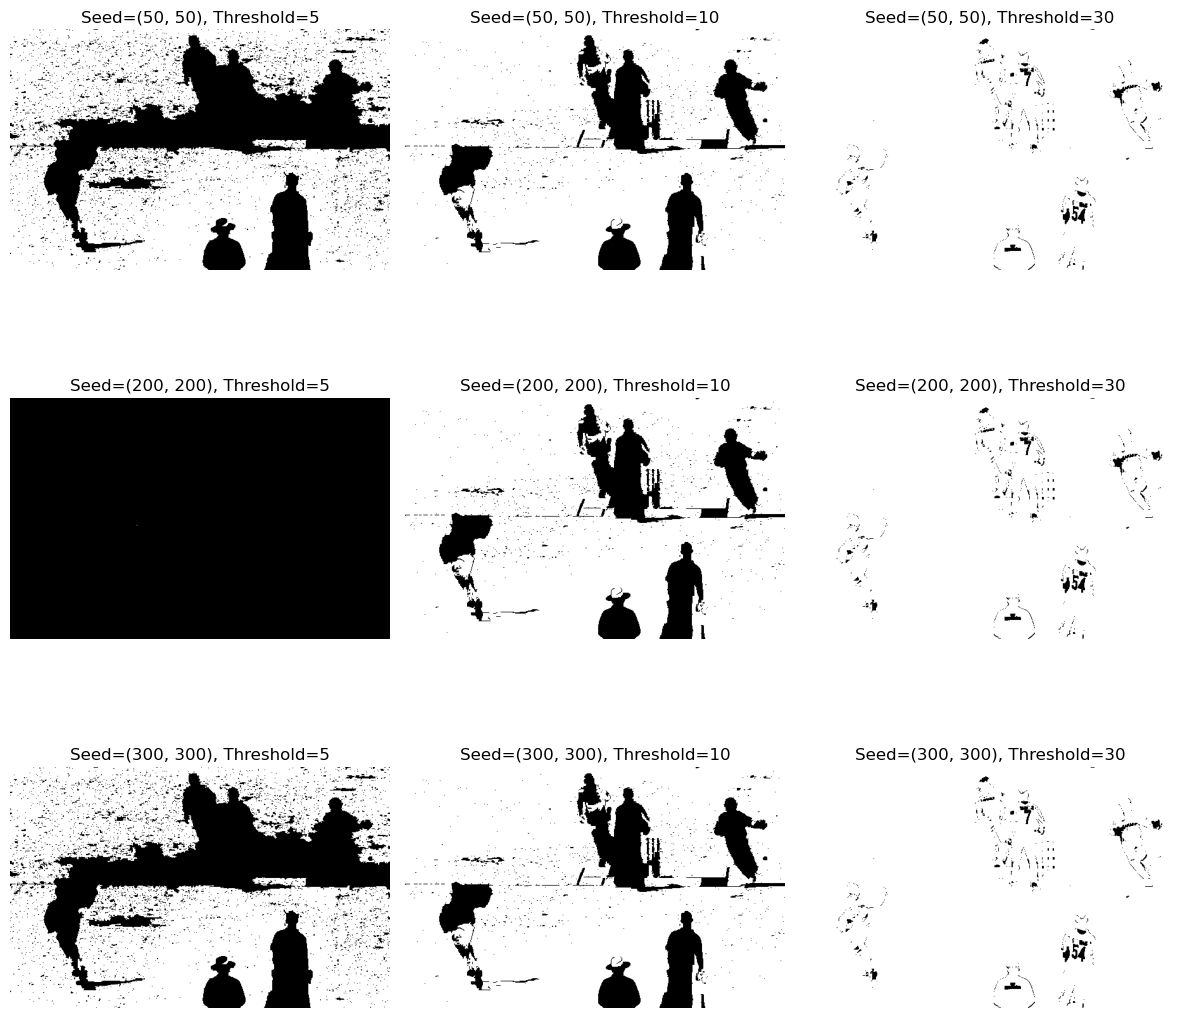

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Region Growing Function
def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    
    # Start with the seed point
    segmented_image[seed] = 255  # Set the seed to white (255) in the segmented image
    
    # 4-connectivity neighbors (left, right, up, down)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # List to store the pixels to process, starting with the seed
    to_process = [seed]
    
    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel
        
        # Check all neighboring pixels
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            
            # Ensure the neighbor is within the image bounds
            if 0 <= nx < rows and 0 <= ny < cols:
                # Check if this neighbor has not been visited (segmented_image[nx, ny] == 0)
                if segmented_image[nx, ny] == 0:
                    # Compare intensity difference between current pixel and neighbor
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255  # Mark the neighbor as part of the region
                        to_process.append((nx, ny))  # Add to the list of pixels to process
    
    return segmented_image

# Read the image
image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Try different seeds and thresholds
seeds = [(50, 50), (200, 200), (300, 300)]  # Different seed points
thresholds = [5, 10, 30]  # Different threshold values

# Plot results for different combinations
fig, axes = plt.subplots(len(seeds), len(thresholds), figsize=(12, 12))
for i, seed in enumerate(seeds):
    for j, threshold in enumerate(thresholds):
        # Apply the region growing function
        segmented_image = region(image_gray, seed, threshold)
        
        # Display results
        axes[i, j].imshow(segmented_image, cmap='gray')
        axes[i, j].set_title(f"Seed={seed}, Threshold={threshold}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


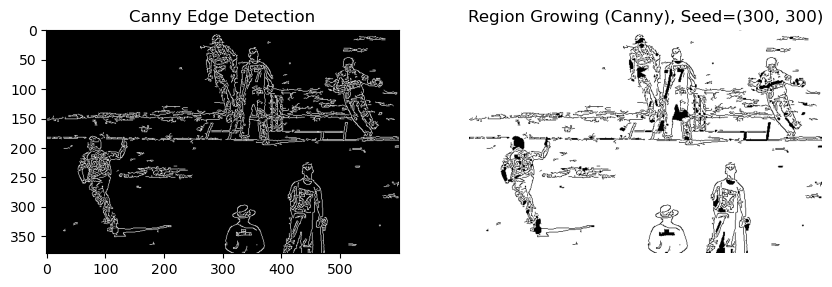

In [91]:
def canny_edge_detection(image, low_threshold, high_threshold):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    
    
    segmented_image[seed] = 255 
  
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
 
    to_process = [seed]
    
    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel
      
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny)) 
    
    return segmented_image

image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")

low_threshold = 50
high_threshold = 150
edge_image_canny = canny_edge_detection(image_gray, low_threshold, high_threshold)

# Apply region growing
segmented_image_canny = region(edge_image_canny, seed, threshold)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(edge_image_canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_canny, cmap='gray')
plt.title(f"Region Growing (Canny), Seed={seed}")
plt.axis("off")

plt.show()
